<a href="https://colab.research.google.com/github/79gun79/logisticmodel/blob/main/%EB%8B%A4%EC%A4%91%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80%EC%8B%9C%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#데이터 훈련

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [86]:
!git clone https://github.com/79gun79/logisticmodel.git
df = pd.read_excel('./logisticmodel/FoodDB.xlsx')
total_data = df[['식품명','단백질(g)','지방(g)','탄수화물(g)','판단']]

fatal: destination path 'logisticmodel' already exists and is not an empty directory.


In [87]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)
print('총 데이터의 개수 :',len(total_data))
print('훈련용 데이터 개수 :', len(train_data))
print('테스트용 데이터 개수 :', len(test_data))

총 데이터의 개수 : 7704
훈련용 데이터 개수 : 5778
테스트용 데이터 개수 : 1926


In [88]:
total_data[5:14]

,식품명,단백질(g),지방(g),탄수화물(g),판단
5,도미구이,61.10000,16.5000,2.100000,0
6,돼지갈비,19.50000,14.4000,8.100000,0
7,병어구이,54.60000,30.8000,0.200000,0
8,불고기,34.40000,25.2000,7.800000,0
9,붕장어소금구이,26.00000,16.2000,11.600000,0
10,소양념갈비구이,60.10000,71.6000,26.200000,1
11,양념왕갈비,27.10000,35.3000,13.700000,0
12,양념장어구이,30.77117,30.5614,8.803709,0
13,임연수구이,53.80000,29.4000,3.500000,0


<Axes: >

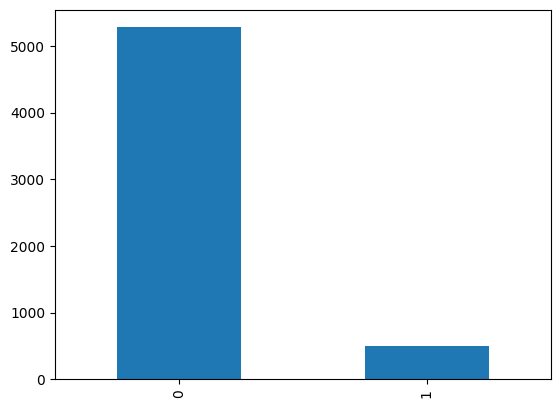

In [89]:
train_data['판단'].value_counts().plot(kind = 'bar')

In [90]:
print(train_data.groupby('판단').size().reset_index(name = '개수'))

   판단    개수
0   0  5278
1   1   500


In [91]:
x = train_data.iloc[:,1:4]
y = train_data.iloc[:,4]

In [92]:
model = Sequential()
model.add(Dense(10,input_dim = 3, activation ='relu'))
model.add(Dense(1,activation='sigmoid'))

In [93]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [94]:
history = model.fit(x, y, epochs=20, batch_size=5)

Epoch 1/20
1156/1156 [==============================] - 2s 2ms/step - loss: 0.6677
Epoch 2/20
1156/1156 [==============================] - 3s 2ms/step - loss: 0.5152
Epoch 3/20
1156/1156 [==============================] - 2s 2ms/step - loss: 0.2318
Epoch 4/20
1156/1156 [==============================] - 2s 2ms/step - loss: 0.2226
Epoch 5/20
1156/1156 [==============================] - 2s 1ms/step - loss: 0.2180
Epoch 6/20
1156/1156 [==============================] - 2s 2ms/step - loss: 0.2160
Epoch 7/20
1156/1156 [==============================] - 2s 2ms/step - loss: 0.2127
Epoch 8/20
1156/1156 [==============================] - 2s 2ms/step - loss: 0.2122
Epoch 9/20
1156/1156 [==============================] - 2s 2ms/step - loss: 0.2123
Epoch 10/20
1156/1156 [==============================] - 2s 2ms/step - loss: 0.2129
Epoch 11/20
1156/1156 [==============================] - 2s 2ms/step - loss: 0.2131
Epoch 12/20
1156/1156 [==============================] - 2s 2ms/step - loss: 0.2118
E

In [95]:
train_data

,식품명,단백질(g),지방(g),탄수화물(g),판단
4241,치즈오븐스파게티,6.50,0.00,0.00,0
6441,햄치즈&에그샐러드샌드위치,21.00,0.00,0.00,0
5735,찜햇닭,21.00,0.00,0.00,0
7259,돼지고기찌개,18.76,4.54,6.77,0
4446,코코넛 밀크 스노우 ICE,4.00,0.00,76.00,0
...,...,...,...,...,...
5226,코코넛머랭,1.00,0.00,0.00,0
5390,바이트 추가 라지,46.93,0.00,0.00,1
860,페퍼로니 (씬),24.00,0.00,0.00,0
7603,제육자글이찌개,9.00,9.00,10.00,0


In [96]:
test_data

,식품명,단백질(g),지방(g),탄수화물(g),판단
2225,오렌지자몽티,2.00,0.0,0.0,0
1839,그린 티 탐앤치노 grande,6.36,10.3,71.6,0
7648,수제비 떡볶이,8.00,4.4,42.0,0
2572,클램 차우더 스프,4.00,0.0,0.0,0
2226,고구마 라떼,16.00,0.0,0.0,0
...,...,...,...,...,...
7430,감자튀김,3.00,8.0,34.0,0
2069,깔라만시 팝핑에이드 L,0.50,0.0,0.0,0
1433,딸기 생크림 오믈렛,1.00,0.0,0.0,0
5078,촉촉하고부드러운초코쉬폰,4.00,0.0,0.0,0


#데이터 테스트

###임의의 데이터 생성 후, 테스트

In [97]:
t1 = np.array([[74.6,35.7,23.4]])
prediction = model.predict(t1)
print("권장 칼로리 초과 예상 확률은 %.1f%%입니다." % (prediction *100))

1/1 [==============================] - 0s 49ms/step
권장 칼로리 초과 예상 확률은 60.8%입니다.


###테스트 데이터에서 하나 선택 후, 테스트

In [98]:
t2 = test_data.iloc[:1, 1:4].values
predictions = model.predict(t2)
print(test_data.iloc[:1, 0].values,"권장 칼로리 초과 예상 확률은 %.1f%%입니다." % (predictions *100))

1/1 [==============================] - 0s 21ms/step
['오렌지자몽티'] 권장 칼로리 초과 예상 확률은 0.9%입니다.


In [99]:
t2

array([[2., 0., 0.]])